# REGRESIÓN LINEAL PARA PREDICCIÓN - (UNA SOLA NEURONA) 

## Edison David González Blandón - JuanEsteban Velásquez

## Obteniendo y normalizando datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos_xls = pd.ExcelFile('DatosPunto1.xlsx') #Obteniendo el archivo
sheet_names = datos_xls.sheet_names #Obteniendo un arreglo con los nombres de las hojas del libro de excel
hoja = datos_xls.parse(sheet_names[0]) #Nuestra hoja de trabajo es la primera pestaña
columnas = [] #Una lista vacia de columnas
columnas_norm = [] #Una lista vacia de las columnas normalizadas
for i in range(0,8):
    columnas.append(hoja.iloc[:,i]) #Se agrega a la lista el elemento = a un arreglo o columna 
    columnas_norm.append((columnas[i]-np.min(columnas[i],axis=0))/(np.max(columnas[i],axis=0)-np.min(columnas[i],axis=0))) ## Estandarizando con Min-Max (  En latex lo siguiente:   $$X_{norm} = \frac{X-\min(X)}{\max(X)-\min(X)}$$  )

etiquetas = hoja.iloc[:,8] #Obteniendo la columna de valores Y1


## Dividr la matriz de datos de entrada para entrenamiento(Bootstrapping)


In [4]:
Numero_Filas_Datos = len(columnas_norm[0]) #Obteniendo la cantidad de elementos en una lista, es decir la cantidad de filas
#print(Numero_Filas_Datos)
#Se realiza la división para hacer bootstraping
N_datos_entrenamiento = int(Numero_Filas_Datos*0.7) #70% para entrenamiento 
N_datos_validacion = int(Numero_Filas_Datos*0.15) #15% para validación
N_datos_prueba = Numero_Filas_Datos - N_datos_validacion - N_datos_entrenamiento #15% para prueba
matrix_normalizado = np.array(columnas_norm).T #Ya quedo un vector de 768 filas y 8 columnas
matrix_salida = np.array(etiquetas) #Quedo como un vector fila
matrix_entrenamiento = matrix_normalizado[0:N_datos_entrenamiento,:] #Matriz[537,8]
matrix_salida_entrenamiento = matrix_salida[0:N_datos_entrenamiento] #Matriz[537,1]
matrix_validacion = matrix_normalizado[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion),:] #Matriz[115,8]
matrix_salida_validacion = matrix_salida[N_datos_entrenamiento:(N_datos_entrenamiento+N_datos_validacion)] #Matriz[115,1]
matrix_prueba = matrix_normalizado[N_datos_validacion:(N_datos_validacion+N_datos_prueba),:] #Matriz[116,8]
matrix_salida_prueba = matrix_salida[N_datos_validacion:(N_datos_validacion+N_datos_prueba)] #Matriz[116,1]

## Entrenamiento

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def LinearRegression(X,y,miu=0.064,iteraciones=5000,tol=0.001):   
    if X.ndim > 1:
        [M,N] = X.shape
    else:
        M = X.shape[0]
        N = 1
        X = X[:,None]
    [M,N] = X.shape
    arr = np.arange(M)
    np.random.shuffle(arr)
    X=X[arr,:]
    y=y[arr]
    #X=X[:,Random]
    VectorBias = np.ones(shape=(M,1))
    X = np.concatenate((VectorBias,X),axis=1)
    theta = np.random.rand(N+1,1)
    for j in range(0,iteraciones):
        h_x = []
        h_x = np.dot(X,theta) 
        h_x = h_x.flatten()
        J = 1/(2*M)*np.dot((h_x-y).T,(h_x-y))
        dJ_dtheta = np.dot((h_x-y).T,X).T
        theta = theta.flatten()
        theta = theta - miu/M * dJ_dtheta
        theta[1:] = theta[1:] - miu*0.1/M*theta[1:] #Regularization
    return theta
def Predict(X,theta): # Función para la predicción
    X = np.insert(X,0,1)
    return np.dot(X,theta)
    

## Validación

10.974568199040531


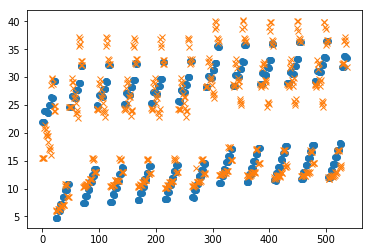

In [12]:
prediccion = np.zeros(matrix_salida_entrenamiento.shape)

theta=LinearRegression(matrix_entrenamiento,matrix_salida_entrenamiento)

prediccion = []
for i in range(0,matrix_entrenamiento.shape[0]):
    prediccion.append(Predict(matrix_entrenamiento[i,:],theta))
prediccion=np.array(prediccion)
d = {'1. valor predicho':prediccion,'2. etiqueta':matrix_salida_entrenamiento,}

error=np.abs(matrix_salida_entrenamiento-prediccion)/matrix_salida_entrenamiento
error=np.sum(error)/len(error)
df = pd.DataFrame(data=d)
df
print(error*100)
plt.plot(prediccion,'o')
plt.plot(matrix_salida_entrenamiento,'x')
plt.show()


## Predicción

10.053687344098813


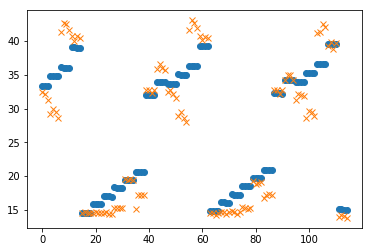

In [60]:
prediccion1=np.zeros(matrix_salida_validacion.shape)
prediccion1 = []
for i in range(0,matrix_validacion.shape[0]):
    prediccion1.append(Predict(matrix_validacion[i,:],theta))
    
prediccion1=np.array(prediccion1)
d = {'1. valor predicho':prediccion1,'2. etiqueta':matrix_salida_validacion,}
df
error=np.abs(matrix_salida_validacion-prediccion1)/matrix_salida_validacion
error=np.sum(error)/len(error)
df = pd.DataFrame(data=d)
df
print(error*100)
plt.plot(prediccion1,'o')
plt.plot(matrix_salida_validacion,'x')
plt.show()


10.326628451155932


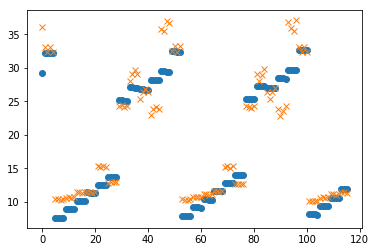

In [66]:
prediccion2=np.zeros(matrix_salida_prueba.shape)
prediccion2 = []
for i in range(0,matrix_salida_prueba.shape[0]):
    prediccion2.append(Predict(matrix_prueba[i,:],theta)) 
prediccion2=np.array(prediccion2)
d = {'1. valor predicho':prediccion2,'2. etiqueta':matrix_salida_prueba,}
error=np.abs(matrix_salida_prueba-prediccion2)/matrix_salida_prueba
error=np.sum(error)/len(error)
df = pd.DataFrame(data=d)
df
print(error*100)
plt.plot(prediccion2,'o')
plt.plot(matrix_salida_prueba,'x')
plt.show()